<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <table>
                    <tr>
                        <td>
                            <img src="https://download.logo.wine/logo/IMDb/IMDb-Logo.wine.png" style="max-width: 60px; display: block;">
                        </td>
                        <td>
                            <font color="black" size="2px">
                            </b>
                            <div style="background-color:#ebc937; padding:4px;">
                             <b>IMDb Movies Analysis</b>
                             </div>
                                </b>
                            </font>
                        </td>
                    </tr>
                </table>
            </div>
        </td>
    </tr>
</table>


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/Vengatesan-K/IMDB-Movies-Analysis/main/IMDB_Movies.csv')

In [59]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [61]:
df.shape

(5043, 28)

In [62]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

<Axes: >

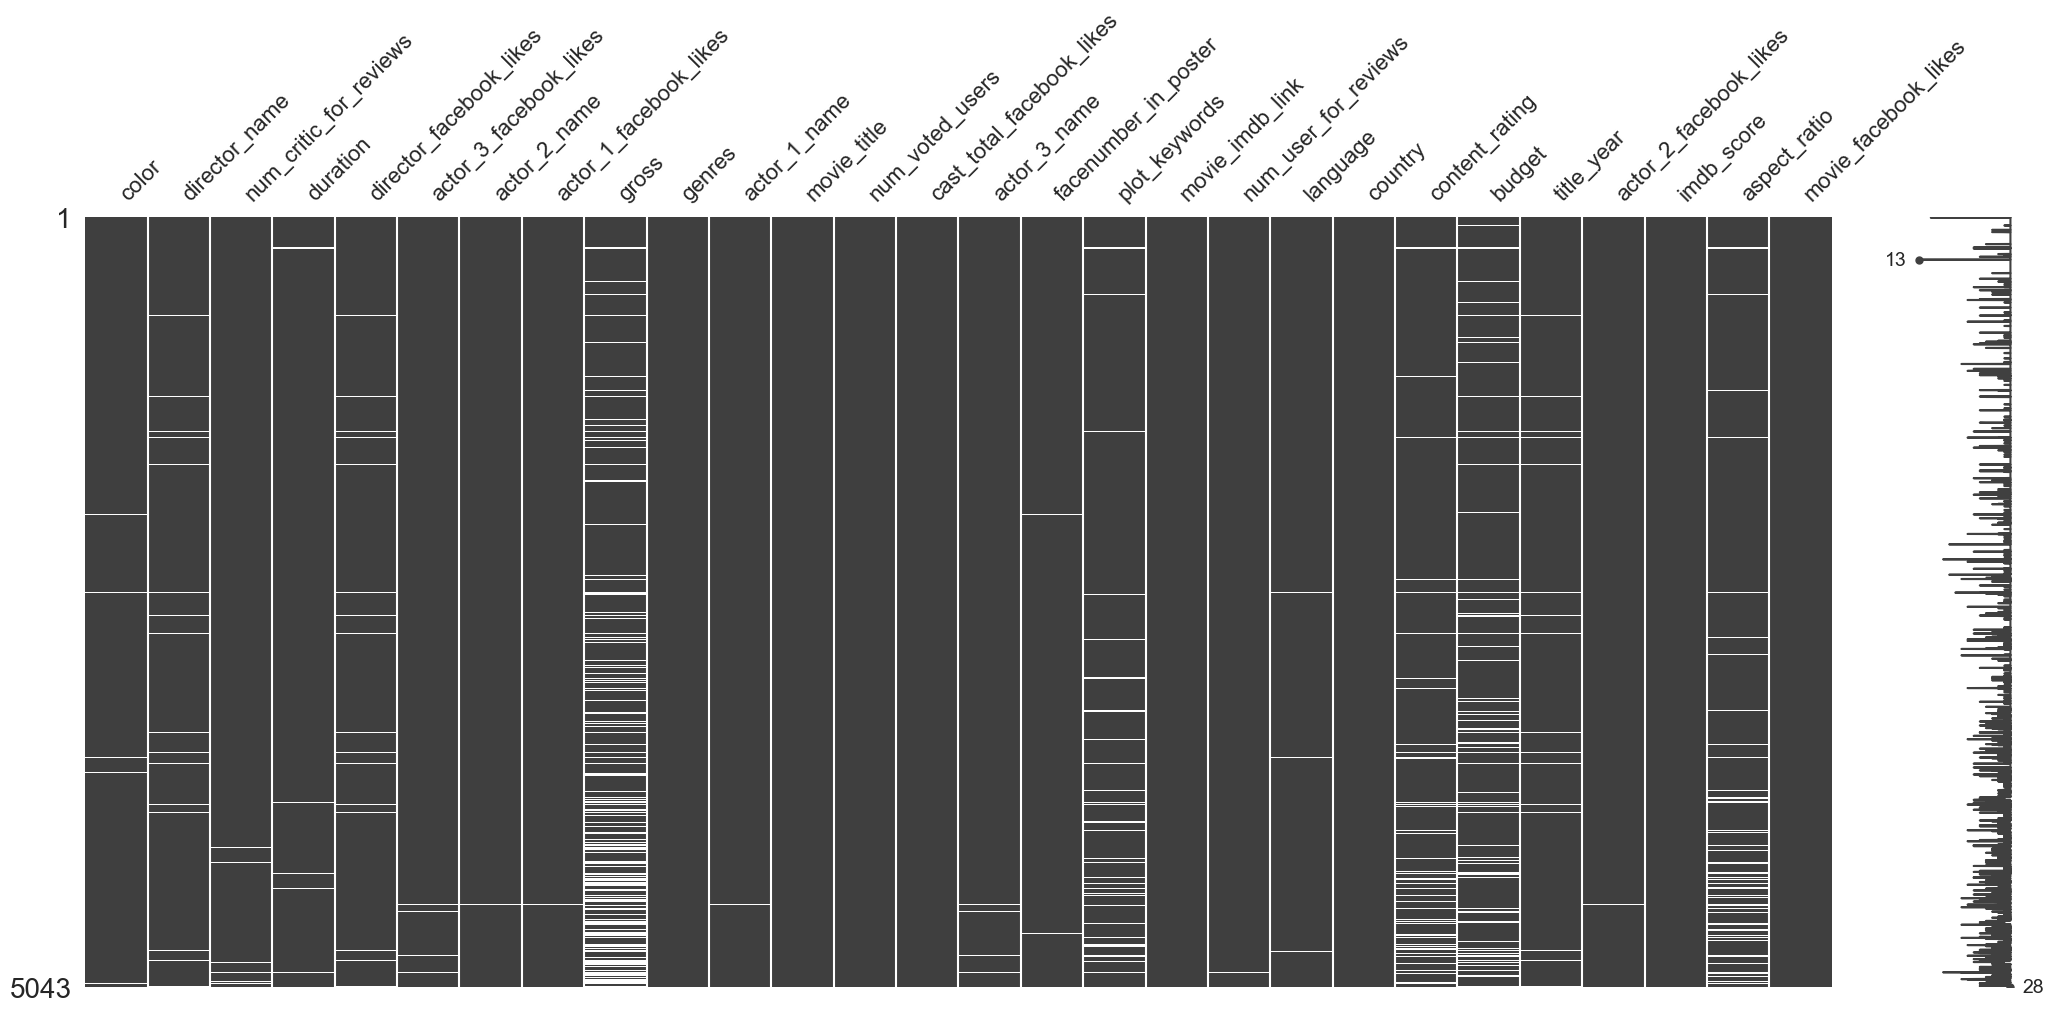

In [63]:
msno.matrix(df)

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
df.dropna(subset=['color', 'num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
                  'actor_2_name', 'actor_1_facebook_likes', 'genres', 'movie_title',
                  'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
                  'facenumber_in_poster', 'movie_imdb_link', 'num_user_for_reviews',
                  'language', 'country', 'imdb_score'], inplace=True)


In [12]:
df.dropna(subset=['director_name'], inplace=True)

In [13]:
df['director_facebook_likes'].fillna(df['director_facebook_likes'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)
df['budget'].fillna(df['budget'].median(), inplace=True)
df['title_year'].fillna(df['title_year'].median(), inplace=True)
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [14]:
df['content_rating'].fillna('Unknown', inplace=True)
df['plot_keywords'].fillna('Unknown', inplace=True)

In [15]:
remaining_null = df.isnull().sum()
print(remaining_null)

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [16]:
df.shape

(4835, 28)

In [17]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [18]:
df['title_year'] = pd.to_datetime(df['title_year'], format='%Y', errors='coerce')

In [19]:
df['title_year'] = df['title_year'].dt.year

In [20]:
df['num_user_for_reviews'] = df['num_user_for_reviews'].astype(int)

In [21]:
df.duplicated().sum()

43

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000


In [24]:
df.to_csv('imdb_cleaned.csv', index=False)

#### A. Movie Genre Analysis: Analyze the distribution of movie genres and their impact on the IMDB score.

In [28]:
genre_split = df['genres'].str.split('|', expand=True).stack()

genre_df = genre_split.to_frame(name='genre')

genre_df.reset_index(inplace=True, drop=True)

In [29]:
genre_df

,genre
0,Action
1,Adventure
2,Fantasy
3,Sci-Fi
4,Action
...,...
13848,Thriller
13849,Comedy
13850,Drama
13851,Romance


In [34]:
genre_stats = {}

for genre in genre_df['genre'].unique():
    genre_data = df[df['genres'].str.contains(genre, na=False)]['imdb_score']
    
    genre_stats[genre] = {
        'Mean': genre_data.mean(),
        'Median': genre_data.median(),
        'Mode': genre_data.mode().values[0] if not genre_data.mode().empty else np.nan,
        'Variance': genre_data.var(),
        'Std': genre_data.std(),
        'Range': genre_data.max() - genre_data.min()
    }

for genre, stats in genre_stats.items():
    print(f"Genre: {genre}")
    print(f"Mean: {stats['Mean']:.2f}")
    print(f"Median: {stats['Median']:.2f}")
    print(f"Mode: {stats['Mode']:.2f}")
    print(f"Variance: {stats['Variance']:.2f}")
    print(f"Standard Deviation (Std): {stats['Std']:.2f}")
    print(f"Range: {stats['Range']:.2f}")
    print("--------------------")

Genre: Action
Mean: 6.22
Median: 6.30
Mode: 6.10
Variance: 1.19
Standard Deviation (Std): 1.09
Range: 7.30
--------------------
Genre: Adventure
Mean: 6.42
Median: 6.50
Mode: 6.70
Variance: 1.26
Standard Deviation (Std): 1.12
Range: 7.00
--------------------
Genre: Fantasy
Mean: 6.27
Median: 6.40
Mode: 6.70
Variance: 1.32
Standard Deviation (Std): 1.15
Range: 7.20
--------------------
Genre: Sci-Fi
Mean: 6.24
Median: 6.30
Mode: 6.70
Variance: 1.43
Standard Deviation (Std): 1.20
Range: 6.90
--------------------
Genre: Thriller
Mean: 6.30
Median: 6.40
Mode: 6.10
Variance: 1.05
Standard Deviation (Std): 1.02
Range: 6.80
--------------------
Genre: Romance
Mean: 6.44
Median: 6.50
Mode: 6.50
Variance: 0.95
Standard Deviation (Std): 0.98
Range: 6.50
--------------------
Genre: Animation
Mean: 6.54
Median: 6.70
Mode: 6.70
Variance: 1.30
Standard Deviation (Std): 1.14
Range: 6.90
--------------------
Genre: Comedy
Mean: 6.17
Median: 6.30
Mode: 6.40
Variance: 1.14
Standard Deviation (Std): 1.07

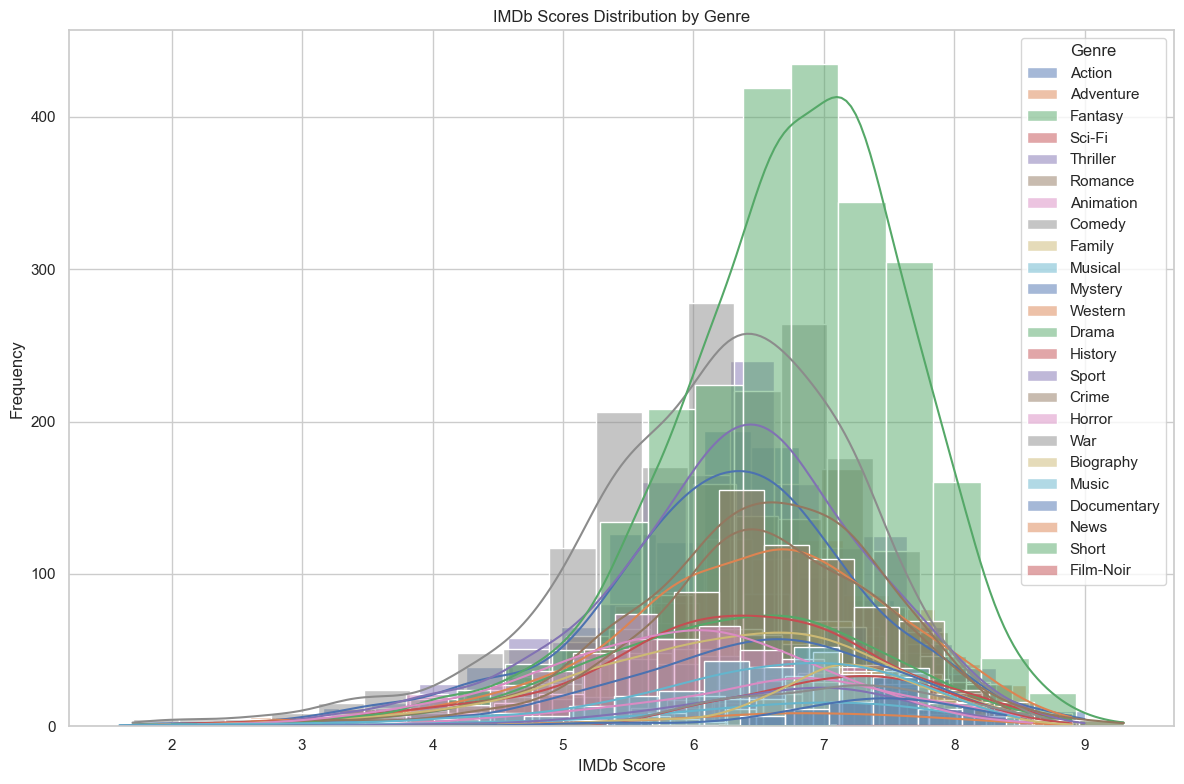

In [36]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for genre in genre_df['genre'].unique():
    genre_data = df[df['genres'].str.contains(genre, na=False)]['imdb_score']
    sns.histplot(genre_data, bins=20, kde=True, label=genre, alpha=0.5)

plt.title('IMDb Scores Distribution by Genre')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

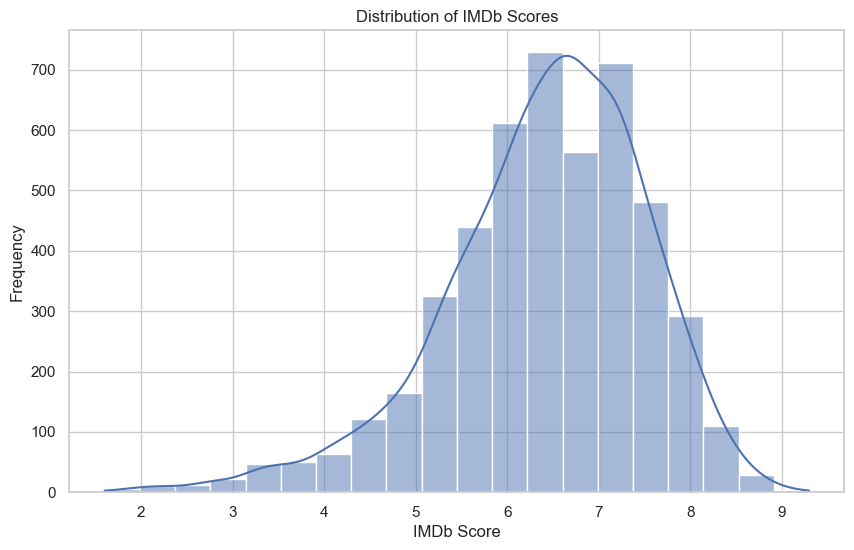

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

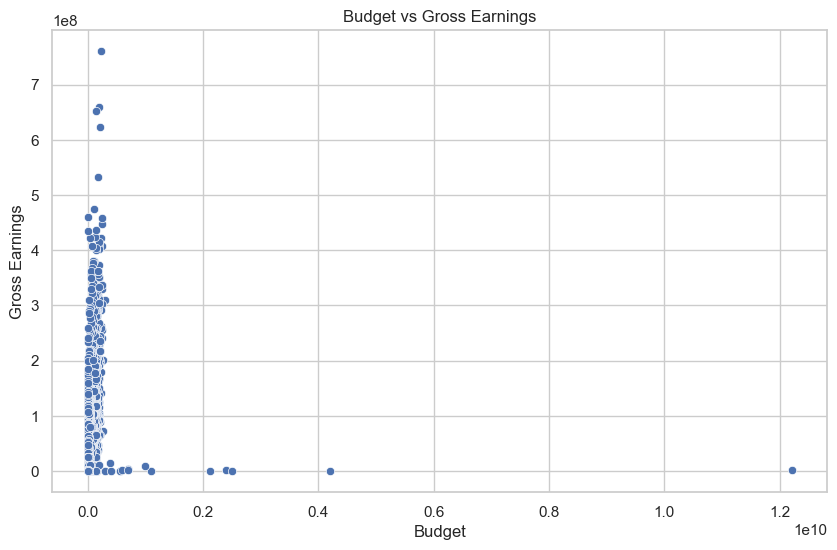

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='gross', data=df)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

#### B. Movie Duration Analysis: Analyze the distribution of movie durations and its impact on the IMDB score.

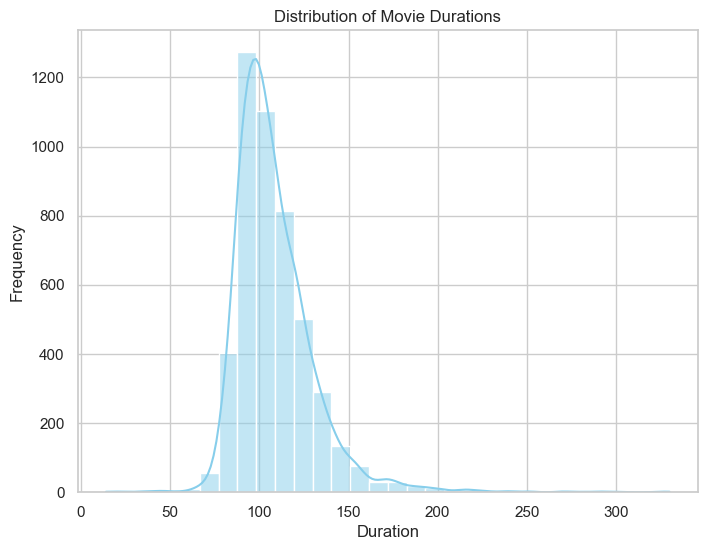

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

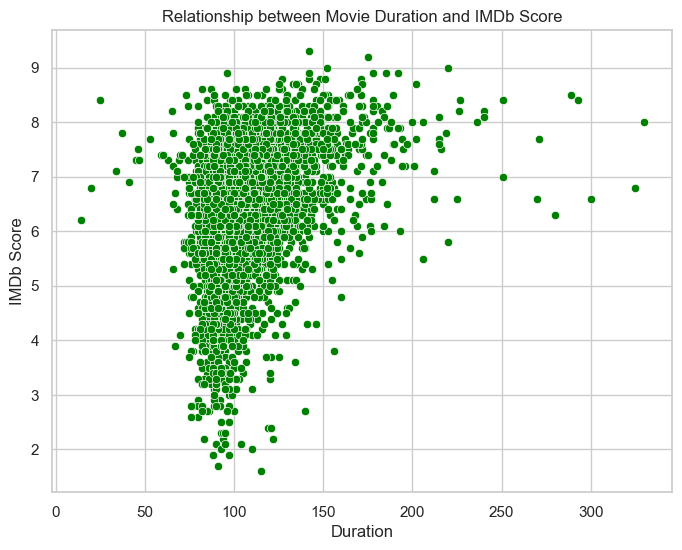

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='imdb_score', data=df, color='green')
plt.title('Relationship between Movie Duration and IMDb Score')
plt.xlabel('Duration')
plt.ylabel('IMDb Score')
plt.show()

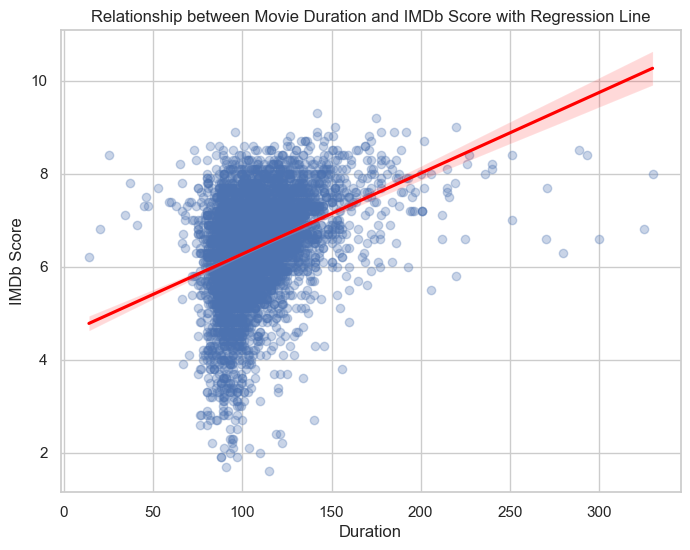

In [47]:
plt.figure(figsize=(8, 6))
sns.regplot(x='duration', y='imdb_score', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Relationship between Movie Duration and IMDb Score with Regression Line')
plt.xlabel('Duration')
plt.ylabel('IMDb Score')
plt.show()


#### C. Language Analysis: Situation: Examine the distribution of movies based on their language.


In [48]:
language_split = df['language'].str.split('|', expand=True).stack().reset_index(drop=True)
language_df = language_split.to_frame(name='language')

language_counts = language_df['language'].value_counts()

print("Most Common Languages:")
print(language_counts.head(10))  #  Top 10 most common languages


Most Common Languages:
language
English      4484
French         72
Spanish        40
Hindi          27
Mandarin       23
German         19
Japanese       16
Cantonese      11
Russian        11
Italian        10
Name: count, dtype: int64


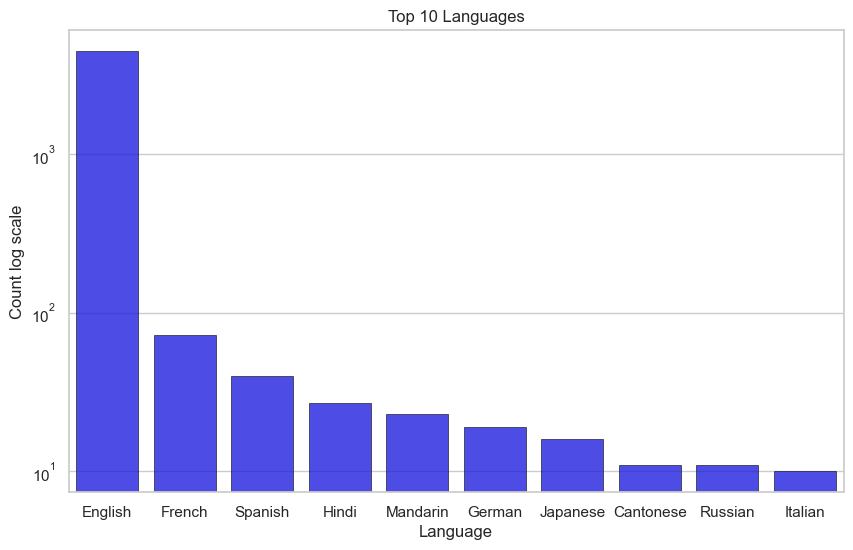

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=language_df, order=language_counts.index[:10], color='blue', edgecolor='black', linewidth=0.5, alpha=0.8)
plt.title('Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Count log scale')
plt.yscale('log')
plt.savefig('top_10_languages.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
language_imdb_stats = {}

for language in language_df['language'].unique():
    language_data = df[df['language'].str.contains(language, na=False)]['imdb_score']
    language_imdb_stats[language] = {
        'Count': language_data.count(),
        'Mean': language_data.mean(),
        'Median': language_data.median(),
        'Mode': language_data.mode().values[0] if not language_data.mode().empty else np.nan,
        'Variance': language_data.var(),
        'Std': language_data.std(),
        'Range': language_data.max() - language_data.min()
    }

for language, stats in language_imdb_stats.items():
    print(f"\nLanguage: {language}")
    print(f"Count: {stats['Count']}")
    print(f"Mean IMDb Score: {stats['Mean']:.2f}")
    print(f"Median IMDb Score: {stats['Median']:.2f}")
    print(f"Mode IMDb Score: {stats['Mode']:.2f}")
    print(f"Variance: {stats['Variance']:.2f}")
    print(f"Standard Deviation (Std): {stats['Std']:.2f}")
    print(f"Range: {stats['Range']:.2f}")



Language: English
Count: 4484
Mean IMDb Score: 6.38
Median IMDb Score: 6.50
Mode IMDb Score: 6.70
Variance: 1.22
Standard Deviation (Std): 1.11
Range: 7.70

Language: Japanese
Count: 16
Mean IMDb Score: 7.37
Median IMDb Score: 7.60
Mode IMDb Score: 6.10
Variance: 1.06
Standard Deviation (Std): 1.03
Range: 3.10

Language: French
Count: 72
Mean IMDb Score: 7.02
Median IMDb Score: 7.20
Mode IMDb Score: 7.20
Variance: 0.51
Standard Deviation (Std): 0.72
Range: 3.50

Language: Mandarin
Count: 23
Mean IMDb Score: 6.77
Median IMDb Score: 7.00
Mode IMDb Score: 6.20
Variance: 1.12
Standard Deviation (Std): 1.06
Range: 4.70

Language: Aboriginal
Count: 2
Mean IMDb Score: 6.95
Median IMDb Score: 6.95
Mode IMDb Score: 6.40
Variance: 0.60
Standard Deviation (Std): 0.78
Range: 1.10

Language: Spanish
Count: 40
Mean IMDb Score: 6.94
Median IMDb Score: 7.15
Mode IMDb Score: 7.20
Variance: 0.73
Standard Deviation (Std): 0.86
Range: 3.80

Language: Filipino
Count: 1
Mean IMDb Score: 6.70
Median IMDb Sc

#### D. Director Analysis: Influence of directors on movie ratings.

In [50]:
director_scores = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)

top_directors = director_scores.head(10)  # Top 10 directors
print("Top Directors based on Average IMDb Score:")
print(top_directors)


Top Directors based on Average IMDb Score:
director_name
Sadyk Sher-Niyaz     8.700
Charles Chaplin      8.600
Damien Chazelle      8.500
Majid Majidi         8.500
Raja Menon           8.500
Sergio Leone         8.475
Tony Kaye            8.450
Christopher Nolan    8.425
S.S. Rajamouli       8.400
Catherine Owens      8.400
Name: imdb_score, dtype: float64


C:\Users\VENKA\AppData\Local\Temp\ipykernel_11224\3063112020.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=top_directors.index, x=top_directors.values, palette=colormap,hue=top_directors.index, dodge=False, orient='h', alpha=0.7, edgecolor='black', linewidth=1, zorder=2)


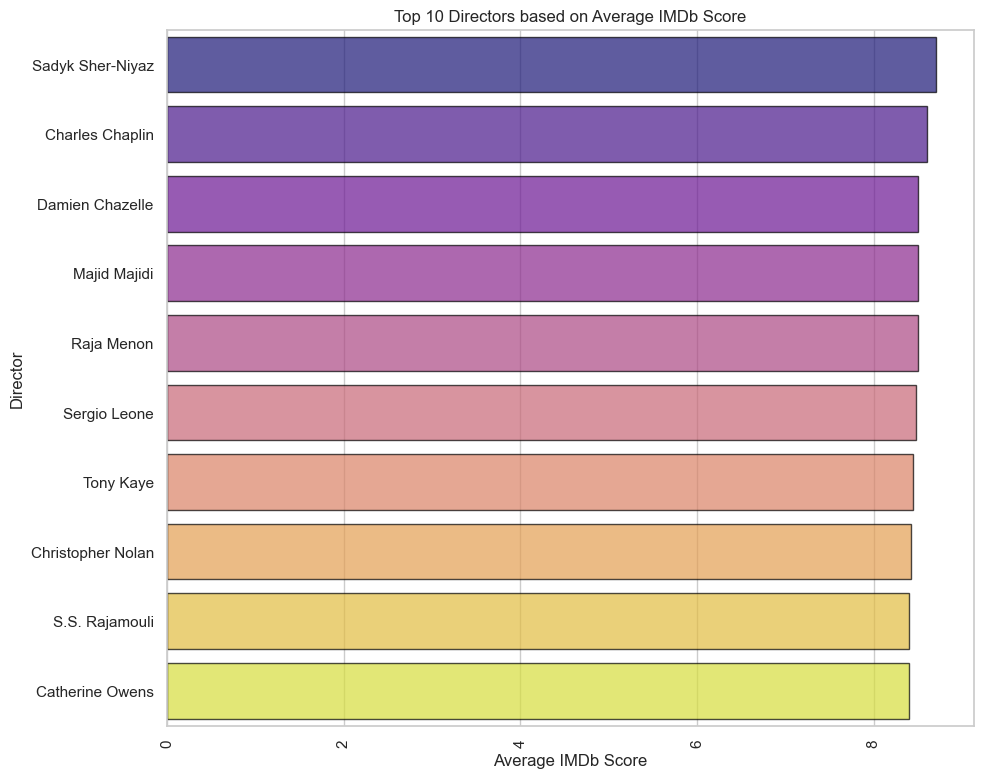

In [82]:
plt.figure(figsize=(10, 8))
colormap = plt.cm.plasma(np.linspace(0, 1, len(top_directors)))
sns.barplot(y=top_directors.index, x=top_directors.values, palette=colormap,hue=top_directors.index, dodge=False, orient='h', alpha=0.7, edgecolor='black', linewidth=1, zorder=2)
plt.title("Top 10 Directors based on Average IMDb Score")
plt.ylabel("Director")
plt.xlabel("Average IMDb Score")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('top_director.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
top_director_movies = df[df['director_name'].isin(top_directors.index)]['imdb_score']

percentiles = [25, 50, 75, 90, 95] 
score_percentiles = np.percentile(top_director_movies, percentiles)

print("\nPercentile Analysis for IMDb Scores of Movies Directed by Top Directors:")
for percentile, score in zip(percentiles, score_percentiles):
    print(f"{percentile}th percentile: {score:.2f}")



Percentile Analysis for IMDb Scores of Movies Directed by Top Directors:
25th percentile: 8.40
50th percentile: 8.50
75th percentile: 8.60
90th percentile: 8.80
95th percentile: 8.90


#### E. Budget Analysis: Explore the relationship between movie budgets and their financial success.

In [52]:
df_cleaned = df.dropna(subset=['budget', 'gross'])

correlation = df_cleaned['budget'].corr(df_cleaned['gross'])
print(f"Correlation between Budget and Gross Earnings: {correlation:.2f}")


Correlation between Budget and Gross Earnings: 0.11


In [65]:
df_cleaned['profit_margin'] = ((df_cleaned['gross'] - df_cleaned['budget']) / df_cleaned['gross']) * 100

highest_profit_margin_movies = df_cleaned.nlargest(10, 'profit_margin')[['movie_title', 'profit_margin', 'budget', 'gross']]
print("\nMovies with the Highest Profit Margin:")
print(highest_profit_margin_movies)



Movies with the Highest Profit Margin:
                    movie_title  profit_margin   budget        gross
5040      A Plague So Pleasant       99.994542   1400.0   25650437.5
4793       Paranormal Activity       99.986100  15000.0  107917283.0
4799                 Tarnation       99.963177    218.0     592014.0
5028               Tin Can Man       99.961014  10000.0   25650437.5
4707   The Blair Witch Project       99.957305  60000.0  140530114.0
5022      Stories of Our Lives       99.941521  15000.0   25650437.5
4957                Eraserhead       99.922029  20000.0   25650437.5
4963    Dude, Where's My Dog?!       99.922029  20000.0   25650437.5
5018                  Flywheel       99.922029  20000.0   25650437.5
5024  All Superheroes Must Die       99.922029  20000.0   25650437.5


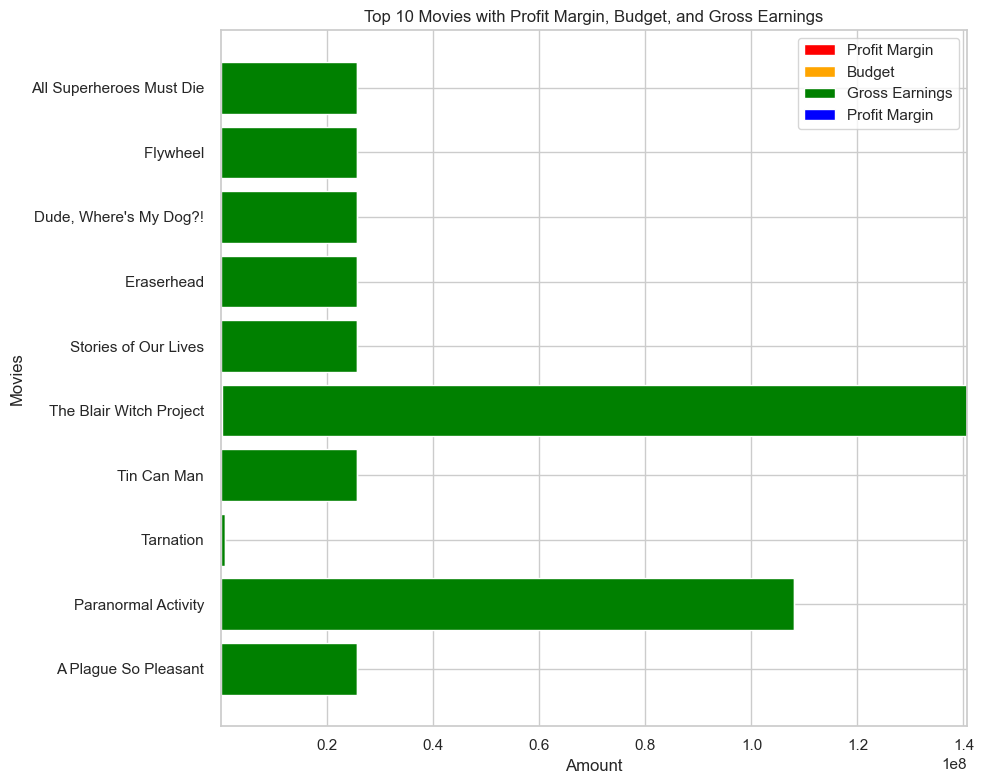

In [67]:
plt.figure(figsize=(10, 8))

movies = highest_profit_margin_movies['movie_title']
budgets = highest_profit_margin_movies['budget']
gross_earnings = highest_profit_margin_movies['gross']
profit_margins = highest_profit_margin_movies['profit_margin']

plt.barh(movies, profit_margins, label='Profit Margin', color='red')
plt.barh(movies, budgets, label='Budget', color='orange')
plt.barh(movies, gross_earnings, left=budgets, label='Gross Earnings', color='green')
plt.barh(movies, profit_margins, left=budgets+gross_earnings, label='Profit Margin', color='blue')

plt.xlabel('Amount')
plt.ylabel('Movies')
plt.title('Top 10 Movies with Profit Margin, Budget, and Gross Earnings')
plt.legend()
plt.tight_layout()

plt.show()


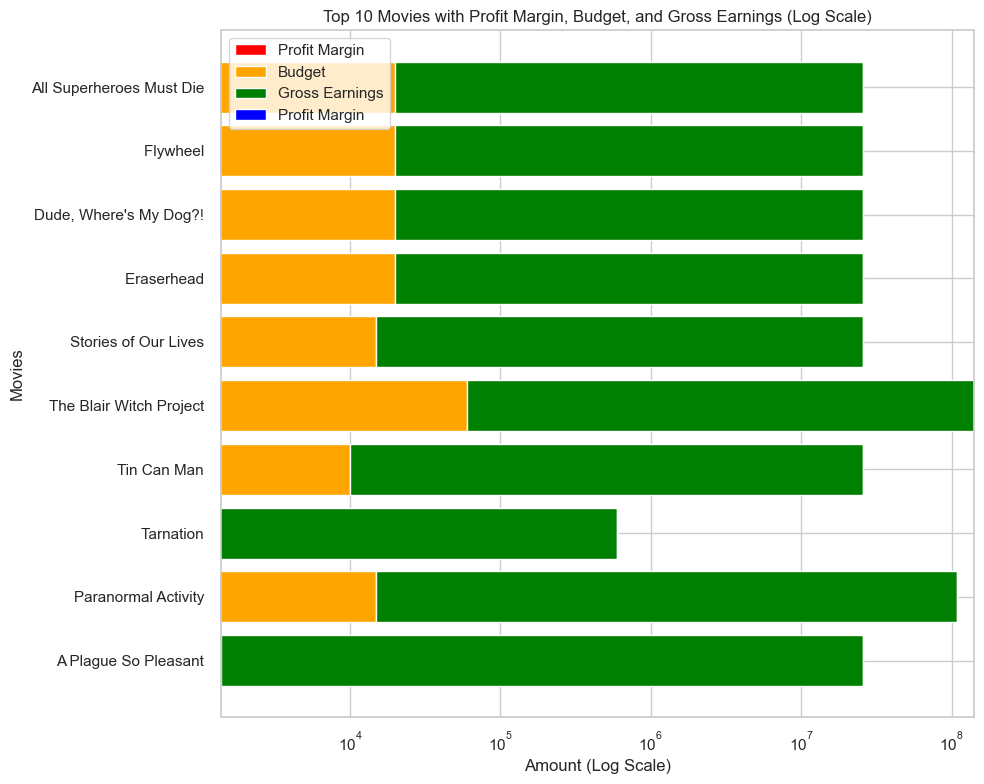

In [69]:
plt.figure(figsize=(10, 8))

movies = highest_profit_margin_movies['movie_title']
budgets = highest_profit_margin_movies['budget']
gross_earnings = highest_profit_margin_movies['gross']
profit_margins = highest_profit_margin_movies['profit_margin']

plt.barh(movies, profit_margins, label='Profit Margin', color='red')
plt.barh(movies, budgets, label='Budget', color='orange')
plt.barh(movies, gross_earnings, left=budgets, label='Gross Earnings', color='green')
plt.barh(movies, profit_margins, left=budgets+gross_earnings, label='Profit Margin', color='blue')

plt.xscale('log')  # Setting x-axis scale to logarithmic

plt.xlabel('Amount (Log Scale)')
plt.ylabel('Movies')
plt.title('Top 10 Movies with Profit Margin, Budget, and Gross Earnings (Log Scale)')
plt.legend()
plt.tight_layout()

plt.show()
